In [1]:
#  importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter



%matplotlib inline
warnings. filterwarnings('ignore')

# performing EDA

In [2]:
#  import dataset
data=pd.read_csv(r"C:\Users\Dell\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# visual dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#  findout shape
data.shape


(7043, 21)

In [7]:
# check catagorial and numerical value
data.info()
# data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# check missing value
# data.isnull().count()
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#  five point summary
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
#  count the number of 0 and 1 in dataset.
print(sorted(Counter(data["SeniorCitizen"]).items()))

[(0, 5901), (1, 1142)]


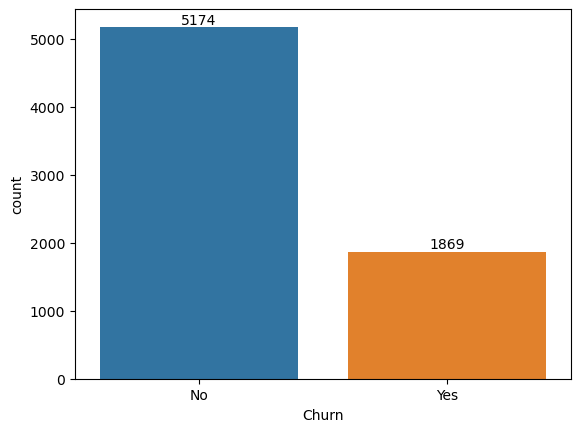

In [12]:
#  checking for imbalance dataset
ax = sns.countplot(data['Churn'])
for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
# print the number of yes or no in the columns
#  if customer left the company that means yes(1)
# no means not left the company(0)
count=data["Churn"].value_counts()

In [14]:
count

No     5174
Yes    1869
Name: Churn, dtype: int64

as we can that 'totalcharge' has numeric type but than it return object type. than we change the datatype

In [15]:
#  convert 'totalCharge' to numeric type/
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors='coerce')

In [16]:
data["TotalCharges"].dtypes

dtype('float64')

In [17]:
#  checking for missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After changing a datatype in "TotalCharge" there will 11 missing value ."Lets remove"

In [18]:
data=data.dropna()

In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
churn_numeric = {'Yes':1, 'No':0}
data.Churn.replace(churn_numeric, inplace=True)

In [23]:
data["Churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [24]:
#  show all the columns with values.
for items in data.columns:
    print(items)
    print(data[items].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [28]:
#  convert all "yes"or "no" with 0 and 1
convert_column=["Partner","Dependents","PhoneService","PaperlessBilling"]

for items in convert_column:
    data[items].replace({"Yes":1,"No":0},inplace=True)

In [29]:
data['gender']=data['gender'].replace({'Female':0,'Male':1})

In [30]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
#  customerId and multipleLines does not any mean lets drop.
data=data.drop(["customerID","MultipleLines"],axis=1)

In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [37]:
#  lets visualize and analysis them.
Internet_service=data["InternetService"].value_counts()
Online_Security=data["OnlineSecurity"].value_counts()
Online_Backup=data["OnlineBackup"].value_counts()
Device_Protection=data["DeviceProtection"].value_counts()
Tech_Support=data["TechSupport"].value_counts()
Streaming_TV=data["StreamingTV"].value_counts()
Streaming_Movies=data["StreamingMovies"].value_counts()
Contract=data["Contract"].value_counts()
PaymentMethod=data["PaymentMethod"].value_counts()

In [47]:
# Internet_service
Online_Security

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Text(0.5, 1.0, 'PaymentMethod')

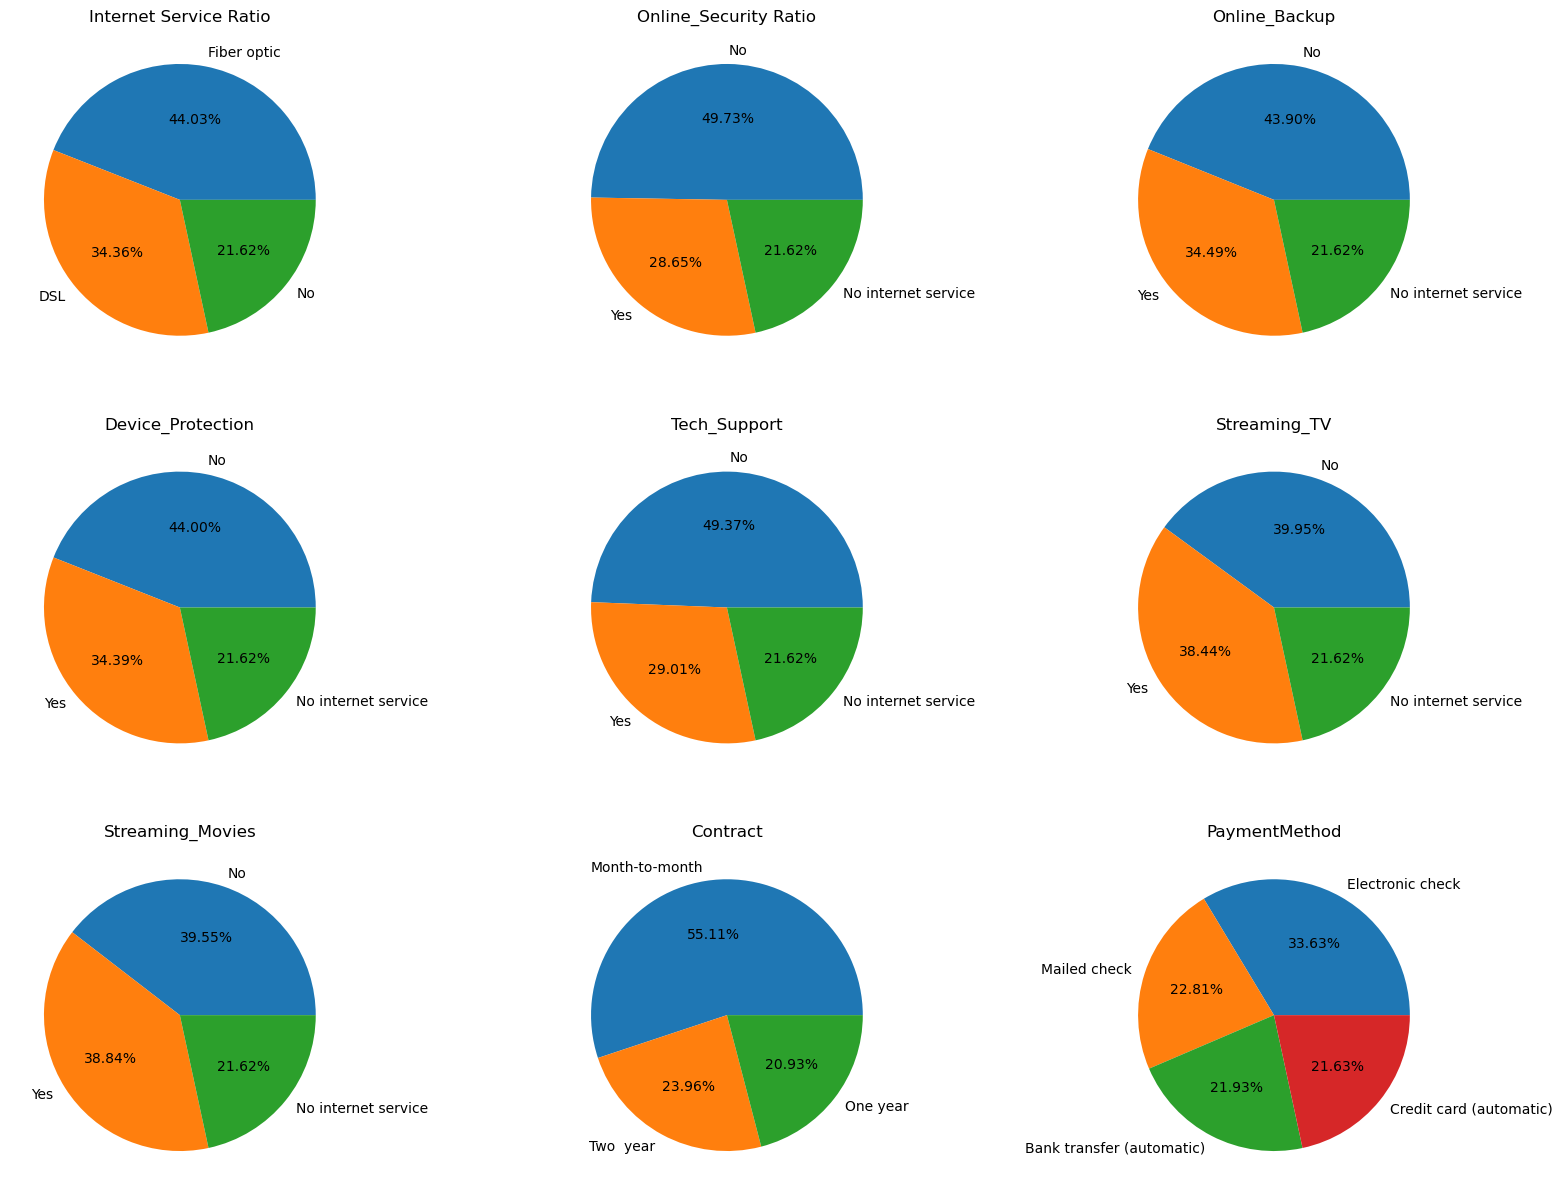

In [48]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.pie(Internet_service, data = data, autopct='%.2f%%',labels=['Fiber optic','DSL','No'])         
plt.title('Internet Service Ratio')


plt.subplot(3,3,2)
plt.pie(Online_Security, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Online_Security Ratio')



plt.subplot(3,3,3)
plt.pie(Online_Backup, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Online_Backup')


plt.subplot(3,3,4)
plt.pie(Device_Protection, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Device_Protection')



plt.subplot(3,3,5)
plt.pie(Tech_Support, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Tech_Support')



plt.subplot(3,3,6)
plt.pie(Streaming_TV, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Streaming_TV')



plt.subplot(3,3,7)
plt.pie(Streaming_Movies, data = data, autopct='%.2f%%',labels=['No','Yes','No internet service'])         
plt.title('Streaming_Movies')



plt.subplot(3,3,8)
plt.pie(Contract, data = data, autopct='%.2f%%',labels=['Month-to-month','Two  year','One year'])         
plt.title('Contract')



plt.subplot(3,3,9)
plt.pie(PaymentMethod, data = data, autopct='%.2f%%',labels=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])         
plt.title('PaymentMethod')

In [54]:
#  Gender-wise ratio

Gender=data["gender"].value_counts()
Gender

1    3549
0    3483
Name: gender, dtype: int64

In [65]:
# Churn Ratio
Churn = data['Churn'].value_counts()
Churn

0    5163
1    1869
Name: Churn, dtype: int64

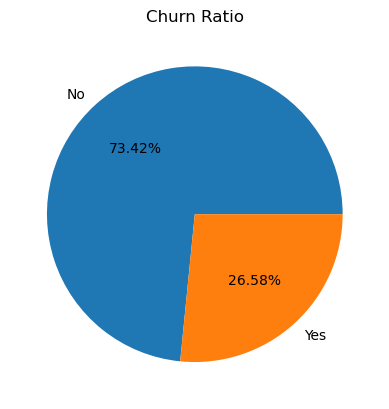

In [66]:
# Checking for imbalance data

plt.pie(Churn, data = data, autopct='%.2f%%', labels = ['No','Yes'])     # 0:NO, 1:Yes
plt.title('Churn Ratio')
plt.show()

# ax = sns.countplot(data['Churn'])
# for bars in ax.containers:
#     ax.bar_label(bars)

as we see that churn has imbalaced dataset

In [67]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
onehot=OneHotEncoder()

In [70]:
cat_columns=['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [72]:
encoded_data=onehot.fit_transform(data[cat_columns])

In [73]:
encoded_data

<7032x28 sparse matrix of type '<class 'numpy.float64'>'
	with 63288 stored elements in Compressed Sparse Row format>

In [74]:
# convert into dataframe
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=onehot.get_feature_names(cat_columns))

In [75]:
churn_encoded_df=pd.concat([data,encoded_df],axis=1)

In [77]:
churn_encoded_df.isnull().sum()

gender                                     11
SeniorCitizen                              11
Partner                                    11
Dependents                                 11
tenure                                     11
PhoneService                               11
InternetService                            11
OnlineSecurity                             11
OnlineBackup                               11
DeviceProtection                           11
TechSupport                                11
StreamingTV                                11
StreamingMovies                            11
Contract                                   11
PaperlessBilling                           11
PaymentMethod                              11
MonthlyCharges                             11
TotalCharges                               11
Churn                                      11
InternetService_DSL                        11
InternetService_Fiber optic                11
InternetService_No                

In [79]:
churn_encoded_df.shape

(7043, 47)

In [83]:
churn_encoded_df=churn_encoded_df.drop(['InternetService_No','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSuppo_Yes','StreamingTV_Yes','StreamingMovies_Yes'],axis = 1)

In [86]:
churn_encoded_df.shape

(7043, 38)

In [143]:
churn_encoded_df=churn_encoded_df.drop(['InternetService_No','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSuppo_Yes','StreamingTV_Yes','StreamingMovies_Yes'],axis = 1)

In [145]:
churn_encoded_df.shape

(10348, 31)

In [119]:
churn_encoded_df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSuppor

In [146]:
churn_encoded_df=churn_encoded_df.fillna(method="ffill")

In [121]:
churn_encoded_df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSuppor

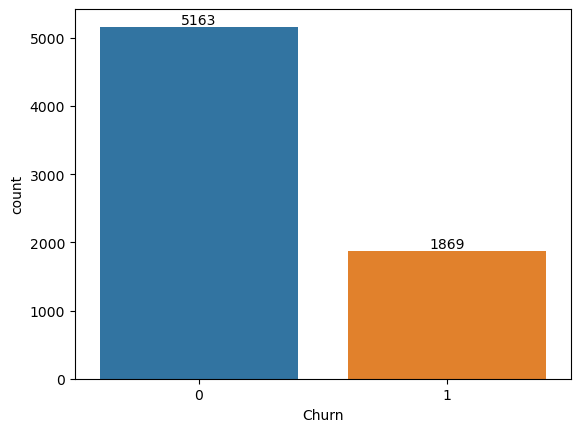

In [122]:
ax = sns.countplot(data['Churn'])
for bars in ax.containers:
    ax.bar_label(bars)

In [147]:
#  lets balance data set.

from imblearn.over_sampling import SMOTE

In [148]:
smote=SMOTE(random_state=0)

In [149]:
x=churn_encoded_df.drop("Churn",axis=1)

In [150]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,...,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
y=churn_encoded_df["Churn"]

In [152]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [153]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,...,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,29.850000,29.850000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,34.000000,1.0,0.000000,56.950000,1889.500000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,1.000000,0.000000,0.000000,0.000000,2.000000,1.0,1.000000,53.850000,108.150000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,1.000000,0.000000,0.000000,0.000000,45.000000,0.0,0.000000,42.300000,1840.750000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,1.000000,70.700000,151.650000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.783472,0.783472,0.783472,0.000000,2.000000,1.0,1.000000,85.290999,155.559673,0.000000,...,0.000000,0.216528,0.000000,1.000000,0.000000,0.000000,0.783472,0.216528,0.000000,0.000000
10344,1.000000,0.775129,0.224871,0.000000,16.000000,1.0,1.000000,83.732898,1281.719586,0.775129,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.775129,0.000000,0.224871,0.000000
10345,0.418756,0.581244,0.418756,0.418756,15.837511,1.0,1.000000,72.167781,1147.354085,0.000000,...,0.000000,0.581244,0.000000,1.000000,0.000000,0.000000,0.418756,0.000000,0.000000,0.581244
10346,0.622794,0.000000,0.377206,0.377206,16.377206,1.0,0.622794,88.748235,1453.145328,0.622794,...,0.377206,0.622794,0.377206,0.377206,0.000000,0.622794,0.622794,0.000000,0.000000,0.377206


In [154]:
x_final,y_final=smote.fit_resample(x,y)

In [155]:
len(x_final)

10348

In [156]:
len(y_final)

10348

In [157]:
# converting tuple to the dataframe
c_df=pd.DataFrame(y_final)

<AxesSubplot:xlabel='Churn', ylabel='count'>

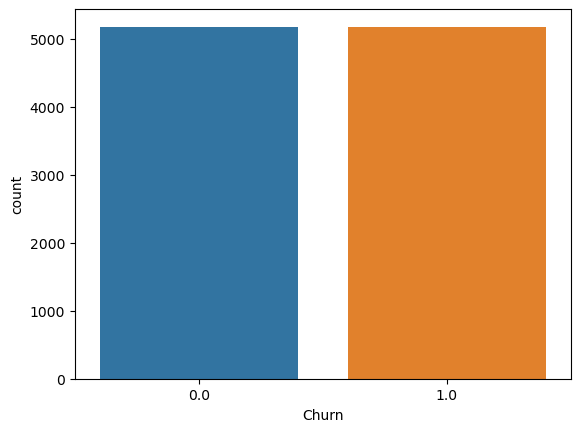

In [158]:
sns.countplot(y_final)

In [159]:
churn_encoded_df=pd.concat([x_final,y_final],axis=1)

In [160]:
churn_encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [161]:
# Independent variable.
x=churn_encoded_df.iloc[:,:-1]

In [162]:
x.shape

(10348, 30)

In [171]:
# dependent variable
y=churn_encoded_df.iloc[:,-1]

In [182]:
y.shape

(10348,)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [175]:
x_train.shape

(8278, 30)

In [176]:
y_train.shape

(8278,)

In [177]:
x_test.shape

(2070, 30)

In [178]:
y_test.shape

(2070,)

In [179]:
#  model building

from sklearn.linear_model import LogisticRegression

In [180]:
Logistic=LogisticRegression()

In [181]:
Logistic.fit(x_train,y_train)

LogisticRegression()

In [184]:
from sklearn.metrics import accuracy_score

In [186]:
pred=Logistic.predict(x_train)

In [187]:
accuracy=accuracy_score(pred,y_train)

In [188]:
accuracy

0.74812756704518

In [189]:
pred1=Logistic.predict(x_test)

In [190]:
acc=accuracy_score(pred1,y_test)

In [191]:
acc

0.7434782608695653